In [21]:
#Importing Libreries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#CLEAN UP
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

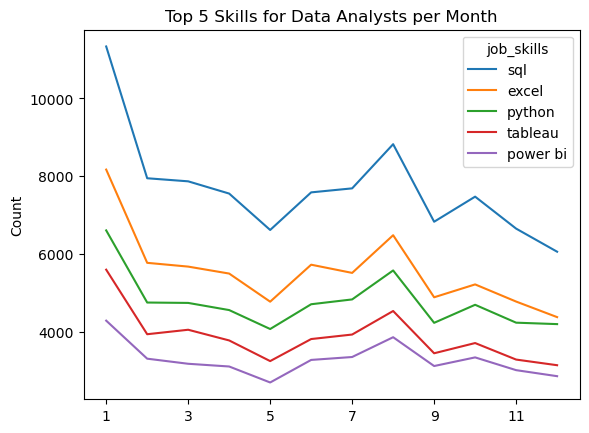

In [ ]:
# Top 5 Skills for Data Analysts per Month

df_DA = df[df['job_title_short']=='Data Analyst'].copy()
df_DA['job_posted_month_no']=df_DA['job_posted_date'].dt.month
df_DA_explode=df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_DA_pivot.loc['Total']=df_DA_pivot.sum()

df_DA_pivot= df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot= df_DA_pivot.drop('Total')

df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()


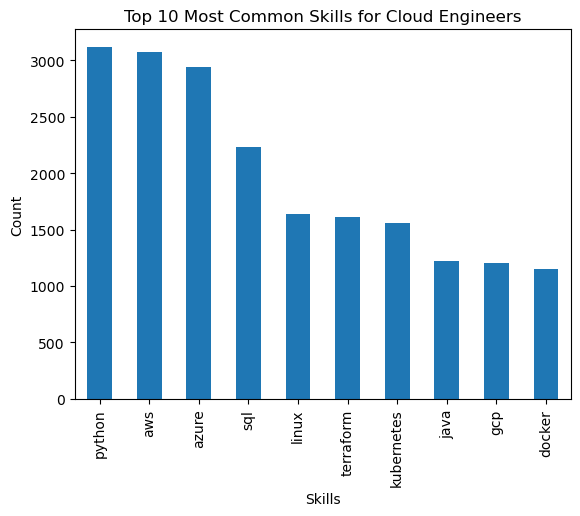

In [25]:
# Using the ast library, clean up the job_skills column to be of the list data type in preparation for exploding this column.
# NOTE: For future problems, it'll be assumed that you have done this step in preparation for exploding this column.
# Explode the job_skills column in the DataFrame and create a bar plot using pandas of the top 10 most common skills for Cloud Engineer.
# Add labels for the x-axis (label as 'Skills'), y-axis (label as 'Count') and a title (set as 'Top 10 Most Common Skills for Cloud Engineers') for the plot.

df_CE = df[df['job_title_short'] == 'Cloud Engineer']
df_exploded = df_CE.explode('job_skills')
skill_counts = df_exploded['job_skills'].value_counts().head(10)
skill_counts.plot(kind='bar')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skills for Cloud Engineers')
plt.show()

In [26]:
# Explode the job_skills column in the DataFrame and calculate the average salary for each skill.
#  Display the top 5 skills with the highest average salary.

df_exploded = df.explode('job_skills')
skill_salary_avg = df_exploded.groupby('job_skills')['salary_year_avg'].mean().reset_index()
skill_salary_avg = skill_salary_avg.sort_values(by='salary_year_avg', ascending=False).head()

skill_salary_avg

,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


In [29]:
# Calculate the number of unique skills required for each job_title_short.
# Explode the job_skills column
# Group by job_title_short
# Count unique skills per title (i.e., num_unique_skills)
# Rename the result column to num_unique_skills and show the first 5 rows

df_exploded = df.explode('job_skills')

# Group by 'job_title_short' and count unique skills
unique_skills_count = df_exploded.groupby('job_title_short')['job_skills'].nunique().reset_index()
unique_skills_count.columns = ['job_title_short', 'num_unique_skills']
unique_skills_count.head()

,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237
